# Exercise: The Price of Weed

#### Summary

Find out how marijuana prices change over time and place in the United States

#### Data Source(s)

Data scraped from http://www.priceofweed.com/, GitHub repository at, https://github.com/frankbi/price-of-weed

Marijuana laws by state from https://data.world/sya/marijuana-laws-by-state

#### Files

- Lots of csvs in data/, formatted at DDMMYYY.csv, daily prices for different states
- `state_marijuana_laws_10_2016.csv`, marijuana laws by state

#### Data dictionary

- **State** the state name
- **HighQ** high quality marijuana, price per ounce
- **HighQN** high quality marijuana, sample size 
- **MedQ** medium quality marijuana, price per ounce
- **MedQN** medium quality marijuana, sample size
- **LowQ** low quality marijuana, price per ounce
- **LowQN** low quality marijuana, sample size

#### Skills

- Reading in many many files
- Combining multiple dataframes
- Cleaning up columns
- Customizing matplotlib graphs

## How to make a list of data in a csv without typing/mergying/etc?


### How do you open a CSV file that's in another directory as your notebook?
**df = pd.read_csv('filepath/weedprices01012015.csv')**

# Read in `data/weedprices01012015.csv`

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
np.nan

df = pd.read_csv('data/weedprices01012015.csv')
df.head()


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,I feel bad for these guys -->,182
1,Alaska,303.02,350,270.45,475,I feel bad for these guys -->,37
2,Arizona,298.51,2638,209.43,2426,I feel bad for these guys -->,306
3,Arkansas,341.68,846,207.20,836,I feel bad for these guys -->,145
4,California,243.96,16512,189.35,19151,I feel bad for these guys -->,1096


## Cleaning things up

I have no idea what the whole "I feel bad for these guys" means, but *it certainly isn't good data*. It should probably be NaN instead: I'll let you decide how you're going to fix that one.

In [2]:
df['LowQ'].replace('I feel bad for these guys -->', np.nan, inplace=True)
df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,NaN,182
1,Alaska,303.02,350,270.45,475,NaN,37
2,Arizona,298.51,2638,209.43,2426,NaN,306
3,Arkansas,341.68,846,207.20,836,NaN,145
4,California,243.96,16512,189.35,19151,NaN,1096


## Graph the top 10 least expensive states for high quality marijuana

In [3]:
top_ten = df.sort_values(by='HighQ', ascending=False).head(2)
top_ten

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
28,North Dakota,393.94,213,339.60,327,NaN,23
45,Vermont,371.23,357,308.86,367,NaN,32


## Graph the top 5 least expensive and the top 5 most expensive states for high quality marijuana, in one graph

You'll probably need to make a new dataframe out of the first 5 and last 5.

In [4]:
bottom_five = df.sort_values(by='MedQ', ascending=False).head(5)
bottom_five


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
50,Wyoming,320.39,133,351.86,197,NaN,12
41,South Dakota,357.05,222,348.81,256,NaN,25
28,North Dakota,393.94,213,339.60,327,NaN,23
45,Vermont,371.23,357,308.86,367,NaN,32
46,Virginia,364.95,3514,293.02,3085,NaN,285


In [5]:
top_five = df.sort_values(by='HighQ', ascending=False).head(5)
top_five

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
28,North Dakota,393.94,213,339.60,327,NaN,23
45,Vermont,371.23,357,308.86,367,NaN,32
32,Maryland,366.01,2863,255.84,2463,NaN,193
46,Virginia,364.95,3514,293.02,3085,NaN,285
15,Iowa,364.92,975,289.05,1045,NaN,122


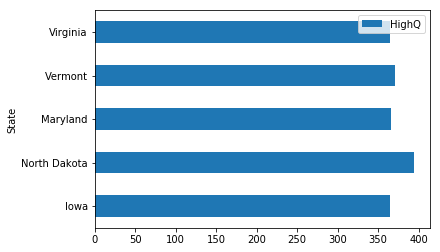

In [9]:
top_five.sort_index().plot(x='State', y='HighQ', kind='barh')

AttributeError: Unknown property figzie

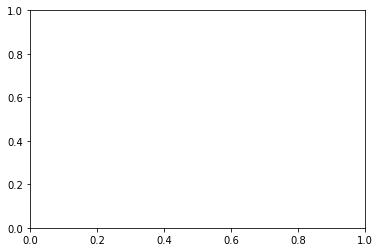

In [7]:
ax = df.plot(x='State', y='HighQ', kind='barh', figzie=(5,20))
ax.set_title('Something else')
# ax[hit Tab to see options]
ax.set_xlabel('xlabel')
ax.grid(axis='x')

#How to delete rows with NaN values: 
# new_df = df[df.column_name.notnull()]
# new_df = df.dropna(subset=['column name'], inplace=True)

# Stacking data frames: pd.concat([df1,df2])

In [ ]:
pd.concat([bottom_two,top_two], ignore_index=True)
#look at the row numbers. They're wierd. ignore the index so it starts over and is a brand new df

In [ ]:
df['LowQ]'.fillna('')

## Now go back and make one of those graphs look nice!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add dollar signs for the bottom

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
```

# Reading in many many files

## Finding the filenames

Make a list of the filenames of every single CSV files inside of the `data` directory. Don't type them out.

If you do this correctly you will have a list of **491** filenames.

In [ ]:
import glob
glob.glob('data/*.csv')
price_dfs = [pd.read_csv(filename) for filename in filenames]
#this returns a list of data frames. to look at one, select it: price_dfs[0]

numbers = [100, 200, 300,  500]
names = ['billy', 'benny', 'bobb']

for number, name in zip(numbers, names):
    print(number, name)
    
for filename, dataframe in zip(filenames, price_dfs):
    dataframe['filenames'] = filename
    # this is saying go into the data file and looking for anything that ends in csv. NOT REGEX
#use list comprehension to turn this into a LIST OF DATAFRAMES
#go through every file name and turn it into pandas DF
# every time we have a fileframe we are going to readin a  csv



## Turn them into dataframes

Read each of them in, converting them to a **list of dataframes**. Save as `price_dfs`.

- Tip: List comprehensions would be good here

## Examing the results

Look at the first 2 rows of the first dataframe.

Look at the first 2 rows of the last dataframe.

**If we combined them, could we tell them apart?**

In [ ]:
extracted = df['name'] = df.sentence.str.extrac('My name is(.*) and I love', expand=True)
df.merge(extracted, right_index=True, left_index=True)
pd.concat([df,extracted], axis=1) #this will stack your dataframes side by side
#renaming columns
extracted.columns= ['name','food'] #need to have them in the proper order

## Making them identifiable

Each dataframe needs to have a column thats says the date. Or, actually... let's just save the filename as a column.

You **could** do it like this.

```python
# Take the first dataframe, which was made from the first filename
# Create a new 'filename' column using the first filename
price_dfs[0]['filename'] = filenames[0]
# Take the second dataframe, which was made from the second filename
# Create a new 'filename' column using the second filename
price_dfs[1]['filename'] = filenames[1]
# Take the third dataframe, which was made from the third filename
# Create a new 'filename' column using the third filename
price_dfs[2]['filename'] = filenames[2]
```

But that way is **not any fun**, and would take too long. I have a faster way.

## Combine all 491 dataframes into one dataframe

Confirm it has **24990 rows and 8 columns.**

## Pull out the day, month and year from each filename

Do **not** store it back yet!

## Okay, now add all three columns back at once

You should rename the columns first!

## Plot the change in marijuana prices in Oregon over time

## Plot the change in marijuana prices in all states over time